# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
employee=pd.read_csv('Employee.csv')

#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# your answer here-1st way
employee.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [4]:
# your answer here-2nd way
display(employee.pivot_table(index=['Department'],values=['Salary'],aggfunc='mean'))

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
# your answer here
display(employee.pivot_table(index=['Department','Title'],values=['Salary'],aggfunc='mean'))

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
display(employee.pivot_table(index=['Title'],values=['Salary','Years'],aggfunc='mean'))

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [7]:
# your answer here
display(employee.pivot_table(index=['Department','Title'],values=['Salary','Years'],aggfunc='mean'))

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [8]:
# your answer here
display(employee.pivot_table(index=['Department','Title'],values=['Salary','Years'],aggfunc=('median','min','max','std','count')))
# Standard deviation for groups of one item has an output of NaN 
# This was expected because needs at least 2 elements

Salary                              Years              \
                      count   max median   min       std count  max median   
Department Title                                                             
HR         VP           1.0  70.0   70.0  70.0       NaN   1.0  8.0    8.0   
           analyst      2.0  35.0   32.5  30.0  3.535534   2.0  4.0    3.0   
IT         VP           1.0  70.0   70.0  70.0       NaN   1.0  8.0    8.0   
           analyst      2.0  35.0   32.5  30.0  3.535534   2.0  2.0    1.5   
           associate    1.0  60.0   60.0  60.0       NaN   1.0  7.0    7.0   
Sales      associate    2.0  55.0   55.0  55.0  0.000000   2.0  3.0    2.5   

                                     
                      min       std  
Department Title                     
HR         VP         8.0       NaN  
           analyst    2.0  1.414214  
IT         VP         8.0       NaN  
           analyst    1.0  0.707107  
           associate  7.0       NaN  
Sales      associate  2.0  0.707107

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
# your answer here
df_em=employee.pivot_table(index=['Department','Title'],values=['Salary','Years'],aggfunc=('median','min','max','std','count'))                    
df_em=df_em.dropna(axis=0,how='any')
display(df_em)
# I have removed the registers with NAN values for Standar Deviation. Why? It's meaningless to define a standard 
# deviation for just one value. So the best decission, in my opinion, is to remove these rows with dropna

Salary                              Years              \
                      count   max median   min       std count  max median   
Department Title                                                             
HR         analyst      2.0  35.0   32.5  30.0  3.535534   2.0  4.0    3.0   
IT         analyst      2.0  35.0   32.5  30.0  3.535534   2.0  2.0    1.5   
Sales      associate    2.0  55.0   55.0  55.0  0.000000   2.0  3.0    2.5   

                                     
                      min       std  
Department Title                     
HR         analyst    2.0  1.414214  
IT         analyst    1.0  0.707107  
Sales      associate  2.0  0.707107

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
# your answer here / GROUP BY
display(employee.groupby('Department').agg({'Name':'count','Salary':'sum'}))

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


In [11]:
# PIVOT TABLE METHOD
e_2=employee.pivot_table(index=('Department'), aggfunc=({'Name':'count','Salary':'sum'}))
e_2.columns=['Num Employees','Total salaries']
display(e_2)

,Num Employees,Total salaries
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [12]:
# your answer here
e_3=employee.pivot_table(index=['Department','Title'],aggfunc=({'Years':'sum','Salary':'mean'}))
e_3.columns=['Total Years','Mean Salary']
display(e_3)

Total Years  Mean Salary
Department Title                              
HR         VP                70.0            8
           analyst           32.5            6
IT         VP                70.0            8
           analyst           32.5            3
           associate         60.0            7
Sales      associate         55.0            5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [13]:
# your answer here--Your custom function here
def dropping_maxima(df):
    # Grouping data to obtain the max for each department
    max_val=df.groupby('Department')['Salary'].max()
    # Dropping values
    df_m1=df[~df['Salary'].isin(max_val)]
    return df_m1

In [14]:
# your answer here
print('Before maxima delete')
display(employee.pivot_table(index=['Department'],aggfunc=({'Salary':'mean'})))
print('')
print('After maxima delete')
not_max_2=dropping_maxima(employee)
not_max_2_piv=not_max_2.pivot_table(index=['Department'],aggfunc=({'Salary':'mean'}))
display(not_max_2_piv)

Before maxima delete


,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00



After maxima delete


,Salary
Department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [15]:
# your answer here
fitbit=pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [16]:
# your answer here
display(fitbit.dtypes)

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [17]:
# your answer here
display(fitbit.describe())

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [18]:
# your answer here
print('Correlation Coeficient: ',fitbit[['Steps','Minutes Very Active']].corr().iloc[0,1])

Correlation Coeficient:  0.571451848106261


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

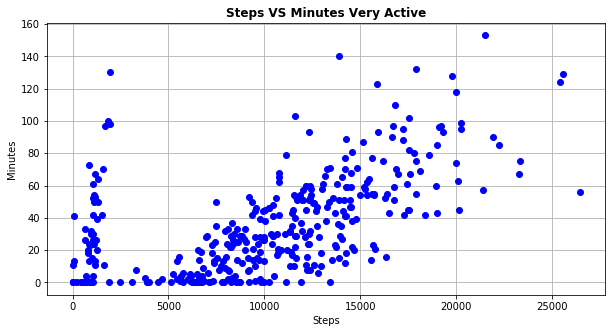

In [19]:
# your answer here
plt.figure(figsize=(10,5))

plt.plot(fitbit['Steps'],fitbit['Minutes Very Active'],'ob')
plt.grid()
plt.xlabel('Steps')
plt.ylabel('Minutes')
plt.title('Steps VS Minutes Very Active',fontweight='bold')

plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [20]:
# your comment here
# There is a minor correlation between both attributes. There are 2 cases: 1st, the ones who has a linear
# correlation for steps over 5000. This region shows a good correlation and could be easily computed a new
# correlation for steps values over 5000.
# 2nd Case: Slope for Steps below 5000 have a higher slope and does not match with the one we could obtain 
# from the first case.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [21]:
# your answer here
print('Correlation Coeficient: ',fitbit[['Minutes Sedentary','Steps']].corr().iloc[0,1])

Correlation Coeficient:  0.07690608062990092


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

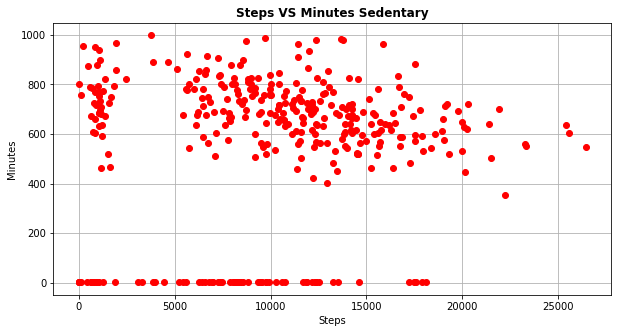

In [22]:
# your answer here

plt.figure(figsize=(10,5))

plt.plot(fitbit['Steps'],fitbit['Minutes Sedentary'],'or')
plt.grid()
plt.xlabel('Steps')
plt.ylabel('Minutes')
plt.title('Steps VS Minutes Sedentary',fontweight='bold')

plt.show()

In [23]:
# Your comment here
# There is no correlation here. Corr coef is very low, below 0.1 and scatter do not show any kind of relationship
# between both columns

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [24]:
# your answer here
print('Correlation Coeficient: ',fitbit[['MinutesOfSleep','Steps']].corr().iloc[0,1])

Correlation Coeficient:  0.1309856595083637


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

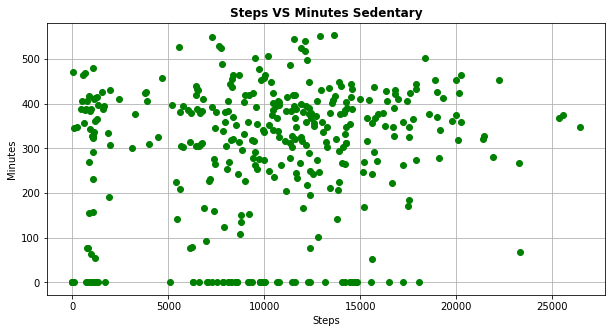

In [25]:
# your answer here
plt.figure(figsize=(10,5))

plt.plot(fitbit['Steps'],fitbit['MinutesOfSleep'],'og')
plt.grid()
plt.xlabel('Steps')
plt.ylabel('Minutes')
plt.title('Steps VS Minutes Sedentary',fontweight='bold')

plt.show()

In [26]:
# These two columns or variables are more correlated than Minutes Sedentary and Steps. But not enough to
# consider that both variables were related somehow

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [27]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit=fitbit[column].corr()

In [28]:
#Print cor_fit
display(cor_fit)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [29]:
# your answer here
display(cor_fit[abs(cor_fit)>0.5])
# The most correlated features are Minutes very active and Steps with a correlation coeficient of 0.571452

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.0,NaN,NaN,NaN,NaN,NaN
Steps,NaN,1.000000,NaN,NaN,0.571452,NaN
Floors,NaN,NaN,1.0,NaN,NaN,NaN
Minutes Sedentary,NaN,NaN,NaN,1.0,NaN,NaN
Minutes Very Active,NaN,0.571452,NaN,NaN,1.000000,NaN
MinutesOfSleep,NaN,NaN,NaN,NaN,NaN,1.0


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [30]:
# your answer here
time_grades=pd.read_csv('Time_Grades.csv')

In [31]:
#Print time_grades
display(time_grades)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

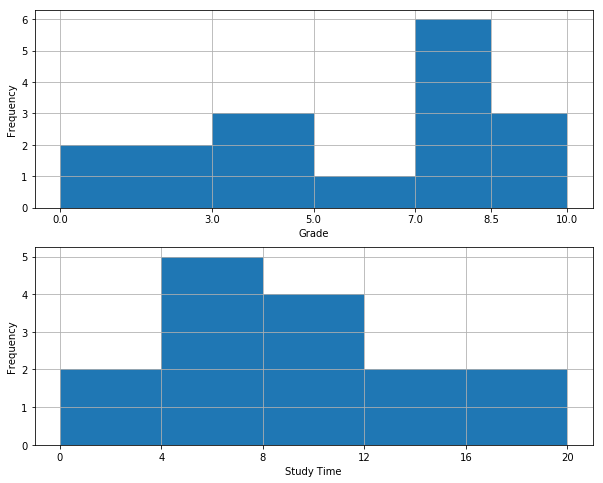

In [32]:
# your answer here
plt.close('all')

fig=plt.figure(figsize=(10,8))

ax=fig.add_subplot(211)
ax.hist(time_grades['Grade'],bins=[0,3,5,7,8.5,10])
ax.set_xticks([0,3,5,7,8.5,10])
ax.grid()
ax.set_ylabel('Frequency')
ax.set_xlabel('Grade')

ax=fig.add_subplot(212)
ax.hist(time_grades['Study time'],bins=range(0,time_grades['Study time'].max()+1,int(time_grades['Study time'].max()/5)))
ax.set_xticks(range(0,time_grades['Study time'].max()+1,int(time_grades['Study time'].max()/5)))
ax.grid()
ax.set_ylabel('Frequency')
ax.set_xlabel('Study Time')

plt.show()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [33]:
# your answer here-Pearson 
print('Pearson Correlation Coeficient: ',time_grades['Study time'].corr(time_grades['Grade']))

Pearson Correlation Coeficient:  0.7980456073578858


In [34]:
## your answer here-Spearman
print('Spearman Correlation Coeficient: ',time_grades['Study time'].corr(time_grades['Grade'],method='spearman'))

Spearman Correlation Coeficient:  0.819658753036942


In [35]:
# Comment
# Seems that both variables are better correlated by Spearman correlation. This means that equation 
# they fit better is not linear

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

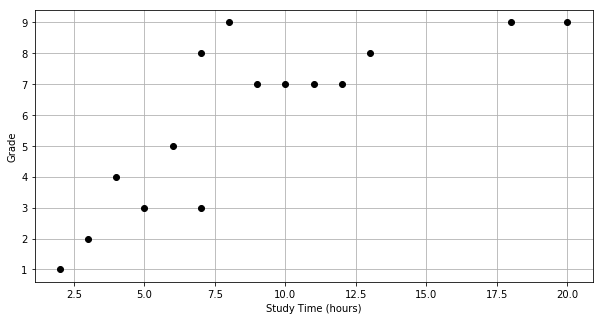

In [36]:
# your answer here
plt.close('all')

plt.figure(figsize=(10,5))
plt.plot(time_grades['Study time'],time_grades['Grade'],'ok')
plt.grid()
plt.xlabel('Study Time (hours)')
plt.ylabel('Grade')
plt.show()

In [37]:
#your comment here
# In the plot we can visualize that both variables could fit better for a logarithmical equation (non linear equation)
# That is why the Pearson correlation coeficient is lower than Pearson correlation coeficient
# Also, Grades have a limit, in this case is 10. So the grade cannot grow more than this limit, 
# so once it reaches this limit

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [38]:
#your comment here
# Spearman is computed on ranks and so depicts monotonic relationships while Pearson 
# is on true values and depicts linear relationships
# So for Pearson we have to clean our dataset from Outliers so we obtain a better correlation
# In Spearman we do not have to worry so much about outliers.